<link rel="stylesheet" type="text/css" href="custom.css">
# Sampling and Exact Reconstruction of Pulses with Variable Width

#### Jupyter notebook companion used to generate the figures of the paper.


Gilles Baechler, Adam Scholefield, Loïc Baboulaz, Martin Vetterli

<span style="font-size:0.75em;">Laboratory of Audiovisual Communications (LCAV), EPFL</span>




In [1]:
%pylab inline
%load_ext autoreload
%autoreload

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib as mpl
import seaborn as sns
import numpy as np

#'paper' or 'notebook'
mode = 'paper'

def set_style(mode='notebook'):
    if mode == 'paper':
        sns.set_palette('Blues_r')
        sns.set_style("whitegrid")
        sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1.0})

        font = {'family' : 'serif',
                'serif'  : ['Times New Roman'],
                'sans-serif'  : ['Times New Roman'],
                'weight' : 'normal',
                'size'   : 8}

        mpl.rc('font', **font)
        
        return 1
        
    else:
        sns.set_palette('Blues_r')
        sns.set_style("whitegrid")

        sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 6.0})

        font = {'family' : 'serif',
                'serif'  : ['Times New Roman'],
                'weight' : 'normal',
                'size'   : 80}

        mpl.rc('font', **font)
        
        return 10
        
scaling = set_style(mode=mode)

style = {'scaling': scaling}
style['3fig_1col'] = (3.5*style['scaling'], 1.5*style['scaling'])
style['3fig_1col_square'] = (3.5*style['scaling'], 1.3*style['scaling'])
style['2fig_1col'] = (3.5*style['scaling'], 2.0*style['scaling'])
style['4fig_2col'] = (7.16*style['scaling'], 4.0*style['scaling'])
style['square'] = (3.5*style['scaling'], 3.5*style['scaling'])
style['dpi']       = 300
style['fontsize']  = 8*style['scaling']

def set_axis_style(ax=None, title=''):
    if axis is None:
        plt(title, fontsize=style['fontsize'], family='serif')
    else:
        ax.set_xlabel(title, fontsize=style['fontsize'], family='serif')
    
def style_legend(ax, loc=1):
    legend = ax.legend(loc=loc, frameon=True, fontsize=style['fontsize']*0.8, labelspacing=0)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_linewidth(1)
    
def save_figure(path):
    plt.subplots_adjust(hspace = 0.05, wspace = 0.05, left=0, right=1, top=1)
    if mode=='paper':
        plt.savefig(path, pad_inches=0)
        
def save_figure_square(path):
    plt.subplots_adjust(hspace = 0.05, wspace = 0.05, left=0, right=1, top=1, bottom=0.16)
    if mode=='paper':
        plt.savefig(path, pad_inches=0)

## Introduction

### Comparison with other FRI signals

Fig. 1

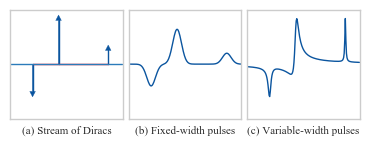

In [3]:
import matplotlib.pyplot as plt

def plot_atoms_fri():
    
    N = 200
    K = 3
    
    tks = np.array([0.2, 0.43, 0.65, 0.87])
    cks = np.array([-0.5, 0.8, -0.85, 0.25])
    dks = np.array([0.1, 0.3, 0.5, 0.0])
    rks = np.array([0.015, 0.02, 0.03, 0.005])
    
    tks = np.array([0.2, 0.43, 0.87])
    cks = np.array([-0.5, 0.8, 0.25])
    dks = np.array([0.1, 1, 0.0])
    rks = np.array([0.015, 0.02, 0.005])
    
    time = np.arange(N)/np.double(N)
        
    #Figure with 3 subfigures on one column
    fig = plt.figure(figsize=style['3fig_1col_square'], dpi=style['dpi'] )
    
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
      
    steps = np.zeros(N)
    for k in np.arange(K):
        steps[np.int(N*tks[k])] = cks[k]
    
    markerline, stemlines, baseline = ax1.stem(tks, cks, '#0b559f', markerfmt=" ")
    plt.setp(markerline, 'markerfacecolor', '#0b559f')
    for k in np.arange(K):
        ax1.arrow(tks[k], 0.0, 0.0, cks[k], head_width=0.05, head_length=0.1, fc='#0b559f', ec='#0b559f')
    ax1.plot(time, np.zeros(N))
    #ax1.setp(baseline, 'color','r', 'linewidth', 2)
    #ax1.plot(time, steps, linestyle='steps')
    ax1.axes.get_xaxis().set_ticks([])
    ax1.set_ylim(-1.3,3)
    
    gauss = np.zeros(N)
    for k in np.arange(K):
        gauss += 2*cks[k]*np.exp(-(time-tks[k])**2/0.003)/np.sqrt(2*np.pi)
    
    ax2.plot(time, gauss)
    ax2.axes.get_xaxis().set_ticks([])
    ax2.set_ylim(-1.3,3)
    
    vpw = np.zeros(N)
    for k in np.arange(K):
        vpw += cks[k]*rks[k]/(rks[k]**2 + (time - tks[k])**2)/np.pi
        vpw += dks[k]*(time - tks[k])/(rks[k]**2 + (time - tks[k])**2)/np.pi
    
    ax3.plot(time, vpw)
    ax3.axes.get_xaxis().set_ticks([])
    ax3.set_ylim(-20,20)
    
    ax1.axes.get_yaxis().set_ticks([])
    ax2.axes.get_yaxis().set_ticks([])
    ax3.axes.get_yaxis().set_ticks([])
    ax1.axes.set_ylim(-1,1)
    ax2.axes.set_ylim(-1,1)
    #ax3.axes.set_ylim(-1,1)
    
    fig.subplots_adjust(right = 1)
    fig.subplots_adjust(left = 0)

    set_axis_style(ax=ax1, title='(a) Stream of Diracs')
    set_axis_style(ax=ax2, title='(b) Fixed-width pulses')
    set_axis_style(ax=ax3, title='(c) Variable-width pulses')
    
plot_atoms_fri()

save_figure_square(path='../figures/fri_signals.pdf')

### Representation of ECG signals

Fig. 2

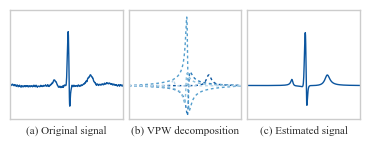

In [4]:
from numpy import genfromtxt

def plot_ecg_signals(indices, legend=True):
    
    data_ecg = genfromtxt('data/ecg.dat', delimiter=',')
    data_fri = genfromtxt('data/fri.dat', delimiter=',')

    time = data_fri[:,0]
    ecg  = data_ecg[:,1]
    fri  = data_fri[:,1:]
    
    #Figure with 3 subfigures on one column
    fig = plt.figure(figsize=style['3fig_1col_square'], dpi=style['dpi'] )
    
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    
    ax1.plot(time, ecg)
    ax1.axes.get_xaxis().set_ticks([])
    ax1.axes.get_yaxis().set_ticks([0])
    ax1.set_ylim(-1.3,3)
    ax1.set_xlim(0,1.6)
    
    for k in indices:
        ax2.plot(time, fri[:,k], '--', dashes=[2,2])
        
    ax2.axes.get_xaxis().set_ticks([])
    ax2.axes.get_yaxis().set_ticks([0])
    ax2.set_ylim(-1.3,3)
    ax2.set_xlim(0,1.6)
    
    ax3.plot(time, np.sum(fri[:,:np.max(indices)+1],1))
    ax3.axes.get_xaxis().set_ticks([])
    ax3.set_ylim(-1.3,3)
    ax3.set_xlim(0,1.6)
    
    if(legend):
        ax1.axes.get_yaxis().set_ticks([])
        ax2.axes.get_yaxis().set_ticks([])
        ax3.axes.get_yaxis().set_ticks([])
        
        set_axis_style(ax=ax1, title='(a) Original signal')
        set_axis_style(ax=ax2, title='(b) VPW decomposition')
        set_axis_style(ax=ax3, title='(c) Estimated signal')

    else:
        ax1.axes.get_yaxis().set_ticks([])
        ax2.axes.get_yaxis().set_ticks([])
        ax3.axes.get_yaxis().set_ticks([])
        
plot_ecg_signals(range(5), legend=True)
        
save_figure_square(path='../figures/ecg_compression_decomposition.pdf')

### Specularity representation (compact)

Fig. 3

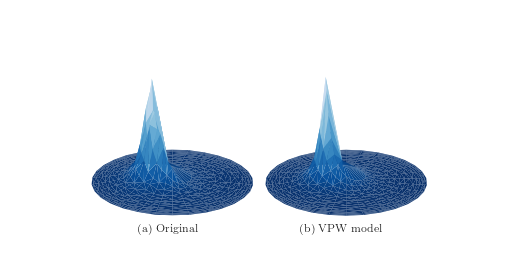

In [8]:
%autoreload 2

from fri import *
from brdf import BrdfRecord
from samplers import *
from spherical_fri import *
from sh_toolbox import *
import matplotlib.gridspec as gridspec

import file_operations

def load_brdf(path, pixel_index):
    
    btf = file_operations.load_btf(path)
    return BrdfRecord(btf.omega_i, btf.omega_o, btf.values[:,pixel_index,2].reshape(btf.nbre_omega_i, -1))

def remove_axis(ax):
    ax.patch.set_alpha(0.0)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    
    # Get rid of the panes                          
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines                         
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    
def remove_axis_2d(ax):
    ax.patch.set_alpha(0.0)
    ax.set_xticks([])
    ax.set_yticks([])

def spherical_vpw_fri_compact(brdf):

    #parameters
    plot_mode   = 'uv'
    lmax        = 15
    n_phi =   30
    n_theta = 15
    drop_factor_phi   = 5
    drop_factor_theta = 5
    K   = 1
    L = 15

    omega = brdf.omega_i

    indices = np.arange(0,brdf.omega_i.n/drop_factor_phi)*drop_factor_phi
    for t in range(n_theta):
        if not t % drop_factor_theta == 0:
            indices = np.delete(indices, np.arange(n_phi/drop_factor_phi*t, n_phi/drop_factor_phi*(t+1)) )

    sh_complex  = expand_sh_complex(brdf.intensity[indices], omega.theta[indices], omega.phi[indices], lmax=lmax, lambd=1)

    brdf_down   = BrdfRecord(brdf.omega_i[indices], brdf.omega_o, brdf.intensity[indices])

    gs = gridspec.GridSpec(1, 2)

    fig = plt.figure(figsize=style['2fig_1col'], dpi=style['dpi'])
    fig.patch.set_facecolor('white')

    brdf_ax = plt.subplot(gs[0,0], projection='3d')
    brdf_est_ax = plt.subplot(gs[0,1], projection='3d')

    brdf.plot_data(ax=brdf_ax, values=brdf.intensity, mode=plot_mode)

    #Compute the Fourier spectrum of the spherical signal
    sh_complex  = expand_sh_complex(brdf.intensity[indices], omega.theta[indices], omega.phi[indices], lmax=lmax, lambd=1)

    #FRI estimation
    fri_estimator = FRI_estimator(K)

    fri_est = fri_estimator.estimate_parameters_diracs_sectoral(sh_complex)
    vpw_spectrum_est_high = fri_est.vpw_sh(L=80)

    vpw_spectrum_est_high.show_spherical(title='', light=brdf.omega_i,  mode=plot_mode, ax=brdf_est_ax)
    
    remove_axis(brdf_ax)
    remove_axis(brdf_est_ax)
    
    brdf_ax.set_title('(a) Original', fontsize=style['fontsize'], family='serif', y=0.05)
    brdf_est_ax.set_title('(b) VPW model', fontsize=style['fontsize'], family='serif', y=0.05)
    
path = '/Users/gbaechle/EPFL/PhD/BRDF Data and Rendering Engines/Dome2_0/2016_03_15_NotreDame_30_15samples_uniform_crop'
pixel_index = 88259
brdf = load_brdf(path, pixel_index)
    
spherical_vpw_fri_compact(brdf)

plt.subplots_adjust(hspace=0.01, wspace=-0.45, left=-0.2, right=1.2, top=1.15, bottom=-0.05)

if mode=='paper':
    plt.savefig('../figures/example_brdf.pdf', pad=0)

## II. Background

### FRI for streams of Diracs

<style>.MathJax {font-size: 200%;}</style>

* $\tau$-Periodic stream of $K$ Diracs

  ${\scriptsize 
  \begin{align*}
x(t) = \sum_{n \in \mathbb{Z}} \sum_{k = 0}^{K-1} c_k \delta (t-t_k-n \tau)
\end{align*}
}$

* Fourier series coefficients

  ${\scriptsize 
  \begin{align*}
X[m] = \frac{1}{\tau} \sum_{k=0}^{K-1} c_k e^{- \frac{2\pi}{ \tau }i t_k m}, \qquad m \in \mathbb{Z}
\end{align*}
}$

* <span style="color:#2a76dd">Rate of innovation</span> of $x(t)$ is $\rho = \frac{2K}{\tau}$


<p style="font-size:0.5em; color:grey;">
\* M. Vetterli, P. Marziliano, and T. Blu, “Sampling Signals with Finite Rate of Innovation,” IEEE Transactions on Signal Processing, vol. 17, no. 6, pp. 1417–1428, 2002.
</p>

> __Theorem__
>
> The signal $X[m] = \sum_{k=0}^{K-1}c_k u_k^m$ is <span style="color:#2a76dd">annihilated</span> by the filter
>
> $${\small  A(z) = \sum_{k=0}^{K-1} A[k]z^{-k} = \prod_{k=1}^{K}(1-u_k z^{-1}), }$$
>
>where $\{ u_k\}_{k=0}^{K-1}$ are the <span style="color:#2a76dd">roots</span> of the filter.

<p style="font-size:0.5em; color:grey;">
\* M. Vetterli, P. Marziliano, and T. Blu, “Sampling Signals with Finite Rate of Innovation,” IEEE Transactions on Signal Processing, vol. 17, no. 6, pp. 1417–1428, 2002.
</p>

### How to find the annihilating filter coefficients?

* Solve $(\boldsymbol{A} \ast \boldsymbol{X})[m] = \boldsymbol{0}$

  ${\small 
  \begin{align*}
\begin{bmatrix}
X[0] & \dots & X[-K+1]\\
X[1] & \dots & X[-K+2]\\
\vdots & \ddots & \vdots\\
X[K-1] & \dots & X[0]
\end{bmatrix}
\begin{bmatrix}
A[1]\\
A[2]\\
\vdots\\
A[K]
\end{bmatrix}
= -\begin{bmatrix}
X[1]\\
X[2]\\
\vdots\\
X[K]
\end{bmatrix}
\end{align*}
}$


* Compute the roots $u_k$ of the filter

### Estimation of the parameters

* Recover Diracs locations as $t_k = -\frac{\tau \angle u_k}{2 \pi}$

* Find $\{c_k\}_{k=0}^{K-1}$ by solving a linear system of equations

### Classical FRI for streams of Diracs

cf. Fig. 5

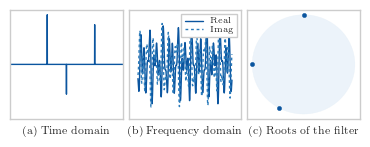

In [9]:
from ipywidgets import interact
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from matplotlib import rc

def fri_time(time, tk, rk, ck):
    
    signal = np.zeros(len(time))
    
    for k in range(len(tk)):
    
        if(rk[k] <= 0.0):
            signal[np.where(time==tk[k])] = ck[k]
        else:
            signal += np.real(ck[k])/np.pi*rk[k]/(np.power(time-tk[k],2) + rk[k]*rk[k])
            signal += np.imag(ck[k])/np.pi*(time-tk[k])/(np.power(time-tk[k],2) + rk[k]*rk[k])
    
    return signal/np.max(signal)
    
def fri_multiple_pulses(time, tks, rks, cks):
    signal = np.zeros(len(time))

    for k in range(len(tks)):
        signal = signal + fri_time(time, tks[k], rks[k], cks[k])
        
    return signal

def fri_freq(freq, tk, rk, ck):
    dk = np.imag(ck)
    ck = np.real(ck)
    
    signal = np.zeros(freq.shape, dtype=np.complex)
    for k in range(len(tk)):
        signal += (ck[k] + 1j*dk[k]*np.sign(freq))*np.exp(-1j*tk[k]*freq - rk[k]*np.abs(freq) )
    return signal

    #return (ck + 1j*dk*np.sign(freq))*np.exp(-1j*tk*freq - rk*np.abs(freq) )
    #return (ck + 1j*dk*np.sign(freq))*np.exp(-1j*tk*freq )*cos(rk)**np.abs(freq)

def compute_uk(tk, rk):
    return np.exp(2*np.pi*( -1j*tk - rk))

def plot_signal(tk, rk, ck):
    
    N = 1000.0
    
    #ck = (1.0 + 1j*dk)/sqrt(1.0+dk**2)
    
    fig = plt.figure(figsize=style['3fig_1col_square'], dpi=style['dpi'])
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)

    t = np.arange(N)/N
    freq = np.fft.fftshift(np.fft.fftfreq(int(N), 0.004))
    spectrum = fri_freq(freq, tk, rk, ck)
    uk = compute_uk(tk,rk)
    
    
    ax1.plot(t, fri_time(t, tk, rk, ck))
    #ax1.plot(t, np.real(np.fft.ifft(fft.fftshift(spectrum))))
    ax1.set_ylim(-1.1,1.1)
    ax1.axes.get_xaxis().set_ticks([])
    ax1.axes.get_yaxis().set_ticks([])
    
    ax2.plot(freq, np.real(spectrum), label='Real', )
    ax2.plot(freq, np.imag(spectrum), '--', dashes=[2,2], label='Imag')
    #ax2.plot(freq, np.abs(spectrum), '--', label='Magnitude')
    ax2.set_ylim(-3,3)
    style_legend(ax2)
    ax2.axes.get_xaxis().set_ticks([])
    ax2.axes.get_yaxis().set_ticks([])
    
    unit_circle = plt.Circle((0,0) ,1.0,color='#dbe9f6', alpha=0.5)
    ax3.add_artist(unit_circle)
    ax3.scatter(np.real(uk), np.imag(uk), zorder=2, color='#0b559f', s=10)
    ax3.set_xlim(-1.1,1.1)
    ax3.set_ylim(-1.1,1.1)
    ax3.axes.get_xaxis().set_ticks([])
    ax3.axes.get_yaxis().set_ticks([])
    
    set_axis_style(ax=ax1, title='(a) Time domain')
    set_axis_style(ax=ax2, title='(b) Frequency domain')
    set_axis_style(ax=ax3, title='(c) Roots of the filter')
        
def plot_signal_rk_0(tk):
    plot_signal(tk, np.zeros(tk.shape), np.ones(tk.shape))
    plt.suptitle(r"$X[m] = \frac{1}{\tau} \sum_{k=0}^{K-1} c_k e^{- \frac{2\pi}{ \tau }i t_k m}$", fontsize=40, x=0.5, y=0.0)
    
def plot_signal_ck_0(tk, rk):
    plot_signal(tk, rk, np.ones(tk.shape))
    plt.suptitle(r"$X[m] = \frac{1}{\tau} \sum_{k=0}^{K-1} c_k e^{- \frac{2\pi}{ \tau }(i t_k m + r_k |m|)}$", fontsize=40, x=0.5, y=0.0)

#plot_signal_rk_0(np.array([0.3, 0.5]))
#plot_signal_rk_0(0.5)

#plot_signal_ck_0(np.array([0.3, 0.5,0.85]), np.array([0.03, 0.05, 0.01]))

plot_signal(np.array([0.33, 0.5, 0.75]), np.zeros(3), np.array([1, -0.6, 0.8]))

save_figure_square(path='../figures/fri_3_pulses.pdf')

## III. Pulses with variable width - the 1D case


* Continuous-time formula

  ${\scriptsize
  \begin{align*}
  x(t) = \sum_{n \in \mathbb{Z}} \left( \sum_{k = 0}^{K-1} \frac{c_k}{\pi} \frac{r_k}{(r_k^2 + (t-t_k-n\tau)^2)} + \sum_{k = 0}^{K-1} \frac{d_k}{\pi} \frac{t-t_k-n\tau}{(r_k^2 + (t-t_k-n\tau)^2)} \right)
  \end{align*}
  }$
  
  
* Fourier series coefficients

  ${\scriptsize 
  \begin{align*}
  X[m] = \frac{1}{\tau} \sum_{k=0}^{K-1} (c_k - i d_k \operatorname{sgn}(m) ) e^{-\frac{2\pi}{\tau} (i t_k m + r_k |m| )}, \qquad m \in \mathbb{Z}
  \end{align*}
  }$

* <span style="color:#2a76dd">Rate of innovation</span> of $x(t)$ is $\rho = \frac{4K}{\tau}$

* Parameters estimation as in the <span style="color:#2a76dd">classical</span> case
  (with $m \geq 0$)

### VPW pulse: symmetric and asymmetric components

cf. Fig. 6

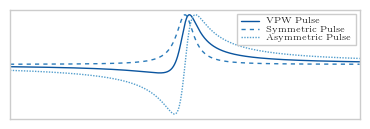

In [10]:
def plot_single_pulse_dec():
    
    tk = np.array([0.5])
    rk = np.array([0.03])
    ck = np.array([0.1 + 0.1j])
    
    N = 1000.0
    t = np.arange(N)/N
    
    #fig = plt.figure(figsize=(12, 6), dpi=600)
    fig, ax = plt.subplots(figsize=style['3fig_1col_square'], dpi=style['dpi'])
    
    signal   = fri_time(t, tk, rk, ck)
    signal_r = fri_time(t, tk, rk, np.real(ck))
    signal_i = fri_time(t, tk, rk, 1j*np.imag(ck))
    
    ax.plot(t, signal, label='VPW Pulse')
    ax.plot(t, signal_r, '--', dashes=[3,3], label='Symmetric Pulse')
    ax.plot(t, signal_i, ':', dashes=[1,1], label='Asymmetric Pulse')
    
    plt.grid(False)
    
    ax.set_ylim(-1.1,1.1)
    #ax.axes.get_xaxis().set_ticks([0, 0.5, 1])
    #ax.axes.get_yaxis().set_ticks([-1, 0, 1])
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    style_legend(ax)
    
plot_single_pulse_dec()

#plt.subplots_adjust(bottom = 0)
save_figure_square(path='../figures/vpwfri_pulse_dec.pdf')

### VPW pulses

cf. Fig. 7

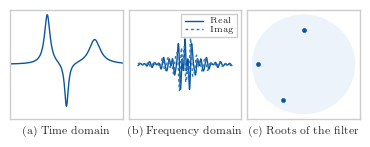

In [11]:
plot_signal(np.array([0.33, 0.5, 0.75]), np.array([0.03, 0.02, 0.06]), np.array([1, -0.6, 1]))
save_figure_square(path='../figures/vpwfri_3_pulses.pdf')

### Noisy case: simulations

cf. Section III.D

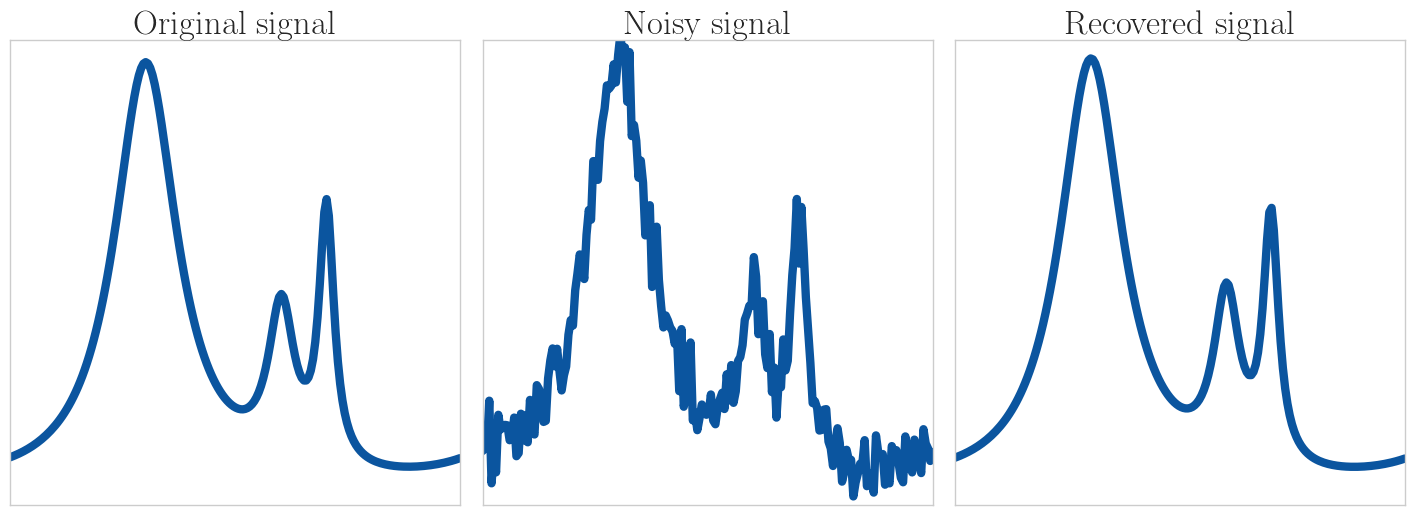

In [10]:
from fri import *
from matplotlib import gridspec

def format_1D(ax, title, label=''):
    ax.set_title(title, fontsize=25)
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    ax.set_ylabel(label, fontsize=25)

def plot_fri_noise(snr):

    gs = gridspec.GridSpec(1, 3)
    
    tk  = np.array([ 0.6, 0.7, 0.3])
    rk  = np.array([ 0.035,  0.02,   0.085])
    ck  = np.array([ 0.75,  0.7,  5.0])
    T = 1.0
    K = 3
        
    #Standard VPW
    N = 200.0

    vpw_fri = VPW_FRI(tk, rk, ck, T)
    time = np.linspace(0, T, N)
    frequencies = np.fft.fftfreq(int(N), T/N)
    omega = 2*np.pi*frequencies/T
    signal = vpw_fri.evaluate_time_domain(time)
    spectrum = vpw_fri.evaluate_Fourier_domain(omega)

    fig = plt.figure(figsize=(18, 6), dpi=300)
    fig.patch.set_facecolor('white')
    plt.subplots_adjust(hspace = 0.01, wspace = 0.05)
    
    signal = np.real(np.fft.ifft(spectrum))
    
    signal_power = np.linalg.norm(signal)**2/N
    noise_power  = signal_power/np.power(10, snr/10.0)
    
    signal_noisy   = signal + np.random.normal(0,sqrt(noise_power),int(N))
    spectrum_noisy = np.fft.fft(signal_noisy)
    
    fri_estimated = FRI_estimator(K, T, T/N, T/N).estimate_parameters(spectrum_noisy[:30])
    spectrum_estimated = fri_estimated.evaluate_Fourier_domain(omega)

    classical_vpw = plt.subplot(gs[0,0])
    classical_vpw.plot(time, signal)
    format_1D(classical_vpw, 'Original signal')
    classical_vpw.set_ylim(0, 1.05*np.max(signal))
    
    recovered_vpw = plt.subplot(gs[0,1])
    recovered_vpw.plot(time, signal_noisy)
    format_1D(recovered_vpw, 'Noisy signal')
    recovered_vpw.set_ylim(0, 1.05*np.max(signal))
    
    signal_estimated = np.real(np.fft.ifft(spectrum_estimated))
    mse = np.mean(np.power(signal-signal_estimated, 2.0))
    snr_recovered = 10*np.log10(signal_power/(np.linalg.norm(signal-signal_estimated)**2/N))
    #print(snr_recovered)

    recovered_vpw = plt.subplot(gs[0,2])
    recovered_vpw.plot(time, signal_estimated)
    format_1D(recovered_vpw, 'Recovered signal')
    recovered_vpw.set_ylim(0, 1.05*np.max(signal))
    
interact(plot_fri_noise, snr=(-10,50));

### Noise comparison for 1 pulse and Cramér-Rao bound

cf. Fig. 8(a)

__Remark:__ the Figure in the paper has been generated for 5000 samples, while by default here only 20 samples are generated.

0:00:43.614215


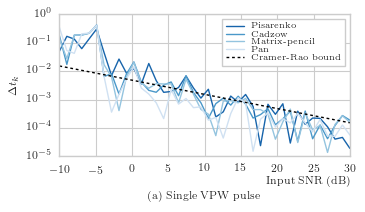

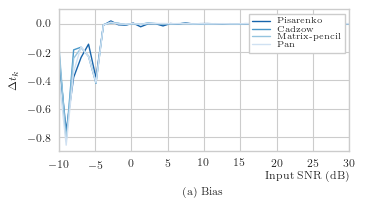

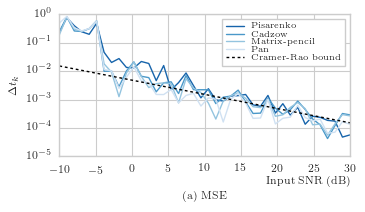

In [13]:
%autoreload
from joblib import Parallel, delayed
import multiprocessing
from datetime import datetime

from fri import *



def format_plot_noisy(title='', filename='../figures/untitled.pdf', average=False):
    
    plt.xlabel('Input SNR (dB)', ha='right', va='center', x=1, fontsize=style['fontsize'], family='serif')
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    if average:
        plt.ylabel(r"Average $\Delta t_k$", fontsize=style['fontsize'], family='serif')
    else:
        plt.ylabel(r"$\Delta t_k$", fontsize=style['fontsize'], family='serif')
    style_legend(plt.gca(), loc=1)
    plt.title(title, y=-0.35, fontsize=style['fontsize'], family='serif')
    
    plt.subplots_adjust(left=0.15, right=0.98, top=0.96, bottom=0.25)
    
    if mode=='paper':
        plt.savefig(filename)

        
def get_fisher_inf_matrix_inv(M, N, tk, rk, ck):
    m = np.arange(0, M)
    
    grad_y = np.zeros((3, N))
    
    grad_Y1 = -ck*2j*pi*m*np.exp(-2*pi*m*(rk + 1j*tk))
    grad_Y2 = -ck*2*pi*m*np.exp(-2*pi*m*(rk + 1j*tk))
    grad_Y3 = np.exp(-2*pi*m*(rk + 1j*tk))
    
    grad_y[0, :] = np.fft.irfft(grad_Y1, n=N)
    grad_y[1, :] = np.fft.irfft(grad_Y2, n=N)
    grad_y[2, :] = np.fft.irfft(grad_Y3, n=N)
    
    fim = np.zeros((3,3))
    
    for n in np.arange(0, N):
        fim += np.outer(grad_y[:, n], grad_y[:, n])
    
    return np.linalg.inv(fim)


def get_mse_bias_tk(signal, number_repetitions, methods_names, snrs, K, T, N, M, tk, CRB=True):
    
    #Important to re-initialize the seed, otherwise all threads share the same state
    random.seed()
    
    signal_power = np.linalg.norm(signal)**2/N
    
    if CRB:
        bias_tks = np.zeros((len(methods_names)+1, len(snrs)))
        mse_tks  = np.zeros((len(methods_names)+1, len(snrs)))
    else:
        bias_tks = np.zeros((len(methods_names), len(snrs)))
        mse_tks  = np.zeros((len(methods_names), len(snrs)))
    
    fri_est = FRI_estimator(K, T, T/N, T/N)
    G = fri_est.construct_G_iqml(signal)
    
    for n in xrange(number_repetitions):
    
        for j, snr in enumerate(snrs):
            noise_power  = signal_power/np.power(10, snr/10.0)

            signal_noisy   = signal + np.random.normal(0,sqrt(noise_power), N)
            spectrum_noisy = np.fft.fft(signal_noisy)
            
            #print signal_noisy.shape
            #print spectrum_noisy[:number_coeffs].shape
            
            for i, method_name in enumerate(methods_names):
                #get the estimation method name
                method = getattr(FRI_estimator, 'estimate_parameters_' + method_name)
                if method_name=='iqml':
                    fri_estimated = method(fri_est, signal_noisy, spectrum_noisy[:M], G=G)[0]
                else:
                    fri_estimated = method(fri_est, spectrum_noisy[:M])
                
                #sort the tks
                if len(fri_estimated.tk) > 1:
                    fri_estimated.tk = np.sort(fri_estimated.tk)
                    
                bias_tks[i, j] += np.sum(tk-fri_estimated.tk)
                mse_tks[i, j]  += np.sum(np.abs(tk-fri_estimated.tk)**2)
                
    return mse_tks/(number_repetitions*len(tk)), bias_tks/(number_repetitions*len(tk))
    

def cramer_rao_bound(number_repetitions, parallel=False):
    
    n_snrs = 40
    snrs = np.linspace(-10, 30, n_snrs)
    
    M = 20
    
    tk  = np.array([ 0.65])
    tk  = np.array([random.rand()])
    rk  = np.array([ 0.02])
    ck  = np.array([ 0.7])
    T = 1.0
    K = len(tk)

    #N = 200.0
    N = 2*M-1
    
    methods_long  = ['Pisarenko', 'Cadzow', 'Matrix-pencil', 'Pan', 'Cramer-Rao bound']
    methods_short = ['pisarenko', 'cadzow', 'esprit', 'iqml']

    bias_tks = np.zeros((len(methods_long), n_snrs))
    mse_tks  = np.zeros((len(methods_long), n_snrs))
        
    fim_inv = get_fisher_inf_matrix_inv(M, N, tk, rk, ck)
    
    vpw_fri = VPW_FRI(tk, rk, ck, T)
    
    time = np.linspace(0, T-1.0/N, N)
    frequencies = np.fft.fftfreq(int(N), T/N)
    omega = 2*np.pi*frequencies/T
    
    spectrum = vpw_fri.evaluate_Fourier_domain(omega)
    signal = np.real(np.fft.ifft(spectrum))
    #signal_power = np.linalg.norm(spectrum)**2/N
    signal_power = np.linalg.norm(signal)**2/N

    #Our estimation (parallel implementation)
    if parallel:
        num_jobs = multiprocessing.cpu_count()
        num_it   = int(np.ceil(number_repetitions/num_jobs))

        res = Parallel(n_jobs=num_jobs, verbose=0)(delayed(get_mse_bias_tk)(signal, num_it, methods_short, snrs, K, T, N, M, tk) for _ in xrange(num_jobs) )
        mse,bias = zip(*res)

        for idx in xrange(num_jobs):
            mse_tks  += mse[idx]/num_jobs
            bias_tks += bias[idx]/num_jobs
    
    #(non-parallel implementation)
    else:
        m,b = get_mse_bias_tk(signal, number_repetitions, methods_short, snrs, K, T, N, M, tk)
        mse_tks += m
        bias_tks += b
            
    #compute variances
    var_tks = mse_tks - bias_tks**2
    
    #CRB  
    for i, snr in enumerate(snrs):
        noise_power  = signal_power/np.power(10, snr/10.0)
        fim_inv_snr = noise_power*fim_inv
        
        var_tks[-1,i] = fim_inv_snr[0,0]
        
    fig = plt.figure(figsize=style['2fig_1col'], dpi=style['dpi'])
    fig.patch.set_facecolor('white')
    
    for idx, method_name in enumerate(methods_long[:-1]):
        plt.semilogy(snrs, np.sqrt(var_tks[idx,:]), label=method_name, color=plt.cm.Blues(1-0.2*(idx+1)))
    
    #Plot CRB
    plt.semilogy(snrs, np.sqrt(var_tks[-1,:]), '--', dashes=[2,2], label=methods_long[-1], color='k')
    
    #Format plot
    format_plot_noisy(title='(a) Single VPW pulse', filename='../figures/cramer_rao_bound.pdf')
    
    
    #MSE
    fig = plt.figure(figsize=style['2fig_1col'], dpi=style['dpi'])
    fig.patch.set_facecolor('white')
    for idx, method_name in enumerate(methods_long[:-1]):
        plt.plot(snrs, bias_tks[idx,:], label=method_name, color=plt.cm.Blues(1-0.2*(idx+1)))
    #plt.plot(snrs, var_tks[-1,:], '--', dashes=[2,2], label=methods_long[-1], color='k')
    
    format_plot_noisy(title='(a) Bias', filename='../figures/cramer_rao_bound_bias.pdf')
    
    #BIAS
    fig = plt.figure(figsize=style['2fig_1col'], dpi=style['dpi'])
    fig.patch.set_facecolor('white')
    for idx, method_name in enumerate(methods_long[:-1]):
        plt.semilogy(snrs, np.sqrt(mse_tks[idx,:]), label=method_name, color=plt.cm.Blues(1-0.2*(idx+1)))
    plt.semilogy(snrs, np.sqrt(var_tks[-1,:]), '--', dashes=[2,2], label=methods_long[-1], color='k')
    
    format_plot_noisy(title='(a) MSE', filename='../figures/cramer_rao_bound_mse.pdf')

start = datetime.now()

cramer_rao_bound(2, parallel=False)

end = datetime.now()
print(end - start)

### Noise comparison for 2 pulses

cf. Fig. 8(b)

__Remark:__ the Figure in the paper has been generated for 5000 samples, while by default here only 20 samples are generated.

In [12]:
%autoreload

def noise_comparison(number_repetitions, parallel=True):
    
    n_snrs = 40
    snrs = np.linspace(-10, 30, n_snrs)
    
    M = 20
    
    tk  = np.array([ 0.42,  0.65])
    #tk  = np.sort(random.rand(2))
    rk  = np.array([ 0.015, 0.035])
    ck  = np.array([ 0.5, 0.7])
    T = 1.0
    K = len(tk)

    #N = 200.0
    N = 2*M-1
    
    methods_long  = ['Pisarenko', 'Cadzow', 'Matrix-pencil', 'Pan']
    methods_short = ['pisarenko', 'cadzow', 'esprit', 'iqml']

    bias_tks = np.zeros((len(methods_long), n_snrs))
    mse_tks  = np.zeros((len(methods_long), n_snrs))
    
    vpw_fri = VPW_FRI(tk, rk, ck, T)
    
    time = np.linspace(0, T-1.0/N, N)
    frequencies = np.fft.fftfreq(int(N), T/N)
    omega = 2*np.pi*frequencies/T
    
    spectrum = vpw_fri.evaluate_Fourier_domain(omega)
    signal = np.real(np.fft.ifft(spectrum))
    #signal_power = np.linalg.norm(spectrum)**2/N
    signal_power = np.linalg.norm(signal)**2/N

    #Our estimation (parallel implementation)
    if parallel:
        num_jobs = multiprocessing.cpu_count()
        num_it   = int(np.ceil(number_repetitions/num_jobs))

        res = Parallel(n_jobs=num_jobs, verbose=0)(delayed(get_mse_bias_tk)(signal, num_it, methods_short, snrs, K, T, N, M, tk, CRB=False) for _ in xrange(num_jobs) )
        mse,bias = zip(*res)

        for idx in xrange(num_jobs):
            mse_tks  += mse[idx]/num_jobs
            bias_tks += bias[idx]/num_jobs
    
    #(non-parallel implementation)
    else:
        m,b = get_mse_bias_tk(signal, number_repetitions, methods_short, snrs, K, T, N, M, tk)
        mse_tks += m
        bias_tks += b
            
    #compute variances
    var_tks = mse_tks - bias_tks**2
    
    #Plot data    
    fig = plt.figure(figsize=style['2fig_1col'], dpi=style['dpi'])
    fig.patch.set_facecolor('white')
    
    for idx, method_name in enumerate(methods_long):
        plt.semilogy(snrs, np.sqrt(var_tks[idx,:]), label=method_name, color=plt.cm.Blues(1-0.2*(idx+1)))
       
    #Format plot
    format_plot_noisy(title='(b) Two VPW pulses', filename='../figures/noise_comparison_tks.pdf', average=True)
    
    #MSE
    fig = plt.figure(figsize=style['2fig_1col'], dpi=style['dpi'])
    fig.patch.set_facecolor('white')
    for idx, method_name in enumerate(methods_long):
        plt.plot(snrs, bias_tks[idx,:], label=method_name, color=plt.cm.Blues(1-0.2*(idx+1)))
    #plt.plot(snrs, var_tks[-1,:], '--', dashes=[2,2], label=methods_long[-1], color='k')
    
    format_plot_noisy(title='(b) Bias', filename='../figures/noise_comparison_tks_bias.pdf', average=True)
    
    #BIAS
    fig = plt.figure(figsize=style['2fig_1col'], dpi=style['dpi'])
    fig.patch.set_facecolor('white')
    for idx, method_name in enumerate(methods_long):
        plt.semilogy(snrs, np.sqrt(mse_tks[idx,:]), label=method_name, color=plt.cm.Blues(1-0.2*(idx+1)))
    
    format_plot_noisy(title='(b) MSE', filename='../figures/noise_comparison_tks_mse.pdf', average=True)
    
    print tk

start = datetime.now()

noise_comparison(2, parallel=False)

end = datetime.now()
print(end - start)

AttributeError: 'module' object has no attribute 'now'

### Other types of kernels

cf. Section III.E

* Exponential reproducing kernels: $\sum_{n \in \mathbb{Z}} c_{m,n} \varphi (t-n) = e^{\alpha_m t}$

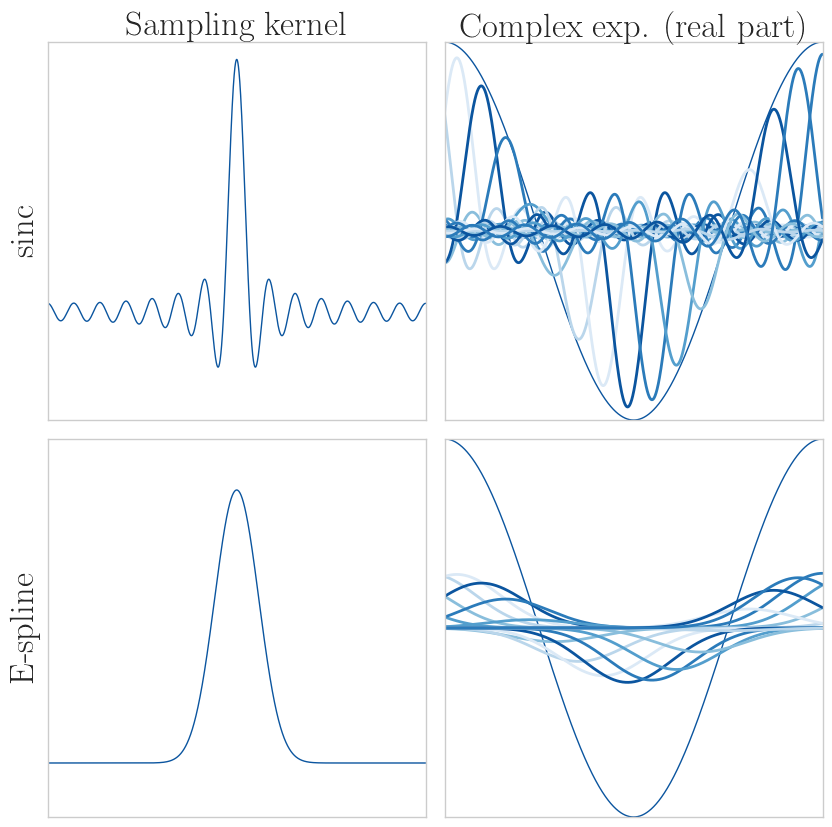

In [32]:
from matplotlib import gridspec

def style_exp_reproduction(ax, N, title='', label=''):
    ax.set_title(title, fontsize=25)
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    ax.set_ylabel(label, fontsize=25)
    ax.set_xlim(0,N)

def plot_sinc_e_spline():
    P = 30.0 #spline order
    N = P+1 #number samples
    T = 1.0  #sampling interval
    
    upsampling_factor = 100.0
    T2 = T/upsampling_factor
    N2 = upsampling_factor*N

    omega = 2*np.pi/N*np.arange(N)
    omega_fine = np.pi/N2*np.arange(-N2, N2)
    omega_fine_for_time = 2*np.pi/N*np.arange(N2)

    time = np.arange(N)
    time_fine = np.arange(upsampling_factor*N-1)/upsampling_factor
    
    alpha_0 = -np.pi*P/(P+1) 
    lambd = 2*np.pi/(P+1)

    if (P%2 == 1):
        alpha_0 = -2*np.pi*P/(P+1)
        lambd = 4*np.pi/(P+1)
    omega_m = alpha_0 + lambd*np.arange(P+1)
    alpha_m = 1j*omega_m

    e_spline_fourier_at_omega_m = np.ones(P+1, dtype=np.complex)
    e_spline_fourier = np.ones(N, dtype=np.complex)
    e_spline_fourier_fine = np.ones(2*N2, dtype=np.complex);
    e_spline_fourier_fine_for_time = np.ones(N2, dtype=np.complex)
    
    sinc_fourier_at_omega_m = np.ones(P+1)
    sinc_fourier = np.ones(N)
    sinc_fourier_fine = np.ones(2*N2, dtype=np.complex);
    sinc_fourier_fine_for_time = np.zeros(int(N2))
    sinc_fourier_fine_for_time[np.arange(int(N/2))] = 1.0

    for m in np.arange(int(P+1)):

        idx = np.setdiff1d(np.arange(int(P+1)), m)
        e_spline_fourier_at_omega_m[idx] = e_spline_fourier_at_omega_m[idx]*(1.0-np.exp(alpha_m[m]-1j*omega_m[idx]))/(1j*omega_m[idx]-alpha_m[m])
        e_spline_fourier                 = e_spline_fourier*(1.0-np.exp(alpha_m[m]-1j*omega))/(1j*omega-alpha_m[m])
        e_spline_fourier_fine            = e_spline_fourier_fine*(1.0-np.exp(alpha_m[m]-1j*omega_fine))/(1j*omega_fine-alpha_m[m])
        e_spline_fourier_fine_for_time   = e_spline_fourier_fine_for_time*(1.0-np.exp(alpha_m[m]-1j*omega_fine_for_time))/(1j*omega_fine_for_time-alpha_m[m])
    
    e_spline = np.fft.irfft(e_spline_fourier, n=np.int(N))
    e_spline_fine = 1/T2*np.fft.irfft(e_spline_fourier_fine_for_time, n=np.int(N2))
    
    sinc = np.fft.fftshift(np.fft.irfft(sinc_fourier, n=np.int(N)))
    sinc =np.fft.irfft(sinc_fourier, n=np.int(N))
    sinc_fine = 1/T2*np.fft.fftshift(np.fft.irfft(sinc_fourier_fine_for_time, n=np.int(N2)))
    #sinc_fine = 1/T2*np.fft.irfft(sinc_fourier_fine_for_time, n=np.int(N2))
    
    gs = gridspec.GridSpec(2,2)
        
    fig = plt.figure(figsize=(10,10), dpi=300)
    fig.patch.set_facecolor('white')
    
    plt.subplots_adjust(wspace = 0.05, hspace=0.05)
    
    spline_ax = plt.subplot(gs[1,0])
    spline_ax.plot(e_spline_fine)
    style_exp_reproduction(spline_ax, N2, label='E-spline')
    
    sinc_ax = plt.subplot(gs[0,0])
    sinc_ax.plot(sinc_fine)
    style_exp_reproduction(sinc_ax, N2, label='sinc', title='Sampling kernel')
    
    V = np.exp(np.outer(alpha_m, np.arange(N)))
    exponentials = np.exp(np.outer(alpha_m, time_fine));
    Phi1 = zeros((np.int(N),np.int(N2)), dtype=np.double)
    Phi1[0,:] = e_spline_fine
    Phi2 = zeros((np.int(N),np.int(N2)), dtype=np.double)
    Phi2[0,:] = sinc_fine
    for n in np.arange(1,int(N)):
        Phi1[n,:] = np.roll(e_spline_fine, int(n*upsampling_factor))
        Phi2[n,:] = np.roll(sinc_fine, int(n*upsampling_factor))
        
    C1 = np.dot(np.diag(1.0/e_spline_fourier_at_omega_m),V)
    
    C2 = np.dot(np.diag(1.0/sinc_fourier_at_omega_m),V)

    m = 13

    spline_repr = plt.subplot(gs[1,1])
    spline_repr.plot(np.real(exponentials[m ,:int(N2/2)]))
    summation1 = np.zeros(np.int(N2))
    
    sinc_repr = plt.subplot(gs[0,1])
    sinc_repr.plot(np.real(exponentials[m ,:int(N2/2)]))
    summation2 = np.zeros(np.int(N2))
    
    for p in np.arange(np.int(N)):
        spline_repr.plot(np.real(C1[m,p]*Phi1[p,:int(N2/2)]), linewidth=2.0)
        sinc_repr.plot(np.real(C2[m,p]*Phi2[p,:int(N2/2)]), linewidth=2.0)
        
    style_exp_reproduction(spline_repr, int(N2/2))
    style_exp_reproduction(sinc_repr, int(N2/2), title='Complex exp. (real part)')
        

plot_sinc_e_spline()


<p style="font-size:0.5em; color:grey;">
\* P. L. Dragotti, M. Vetterli, and T. Blu, "Sampling Moments and Reconstructing Signals of Finite Rate of Innovation:
Shannon meets Strang-Fix," IEEE Transactions on Signal Processing, vol. 55, no. 5, pp. 1741-1757, 2007.
<br/>

\* Uriguen, Jose Antonio, Thierry Blu, and Pier Luigi Dragotti. "FRI sampling with arbitrary kernels."IEEE Transactions on  Signal Processing, 61.21 (2013): 5310-5323.
</p>

## IV. Pulse with variable width - the 2D case

### Example of 3 2D VPW pulses

cf. Fig. 9

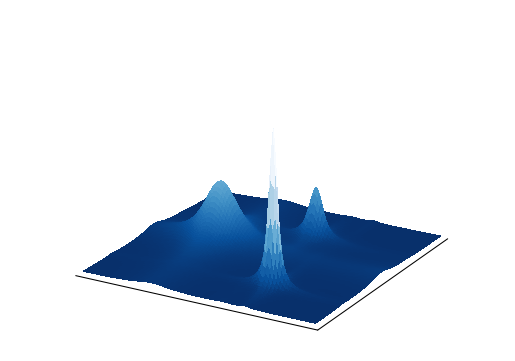

In [15]:
from fri import *
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D

def format_2D(ax, title='', label=''):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.w_zaxis.line.set_lw(0.)
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])
    ax.set_zlabel(label, fontsize=25)
    #ax.set_title(title, fontsize=25)
    
    ax.set_title(title, fontsize=style['fontsize'], family='serif', y=0.05)

def plot_fri_2D_example(radial=False):
    
    tk2  = np.array([[ 0.6,  0.7], [ 0.7,  0.2], [ 0.3,  0.5]])
    tk = tk2[:,1]
    rk  = np.array([ 0.035,  0.02,   0.085])
    ck  = np.array([ 0.75,  0.7,  5.0])
    T = 1.0
    
    #2D VPW, 'normal'
    M = 100.0
    N = 100.0

    if radial:
        vpw_fri2 = VPW_FRI_2D_Radial(tk2, rk, ck, T/M, T/N)
    else:
        vpw_fri2 = VPW_FRI_2D(tk2, rk, ck, T/M, T/N)
    y_grid, x_grid = np.meshgrid(np.linspace(0, T, N),np.linspace(0, T, M))
    f_u = 2*np.pi*np.fft.fftfreq(int(M), T/M)/T
    f_v = 2*np.pi*np.fft.fftfreq(int(N), T/N)/T
    v_grid, u_grid = np.meshgrid(np.fft.fftshift(f_v), np.fft.fftshift(f_u))
    spectrum_2D = vpw_fri2.evaluate_Fourier_domain(f_u, f_v)

    fig = plt.figure()
    vpw_2D_freq_ax = fig.add_subplot(111, projection='3d')
    
    vpw_2D_freq_ax.plot_surface(x_grid, y_grid, np.real(np.fft.ifft2(spectrum_2D)), rstride=1, cstride=1, linewidth=0.0, antialiased=False, cmap=plt.cm.Blues_r, alpha=1.0)
    format_2D(vpw_2D_freq_ax, label='')
    
plot_fri_2D_example()

if mode=='paper':
    plt.savefig('../figures/example_2D_VPW_pulses.pdf', bbox_inches='tight')

### Radial pulses

cf. Section IV.B

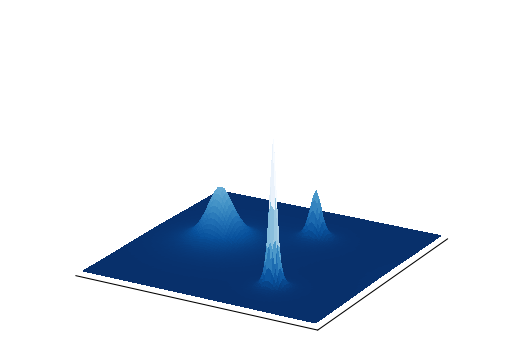

In [16]:
plot_fri_2D_example(radial=True)

if mode=='paper':
    plt.savefig('../figures/example_2D_VPW_pulses_radial.pdf', bbox_inches='tight')

### Anisotropic pulses

cf. Section IV.C

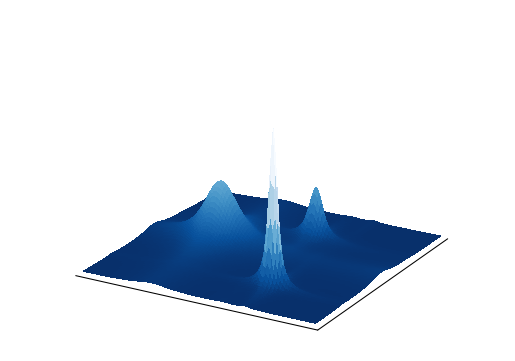

In [17]:
from fri import *
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D

def plot_fri_2D_example_ani():
    
    tk2  = np.array([[ 0.6,  0.7], [ 0.7,  0.2], [ 0.3,  0.5]])
    tk = tk2[:,1]
    rk  = np.array([ [0.035, 0.02],  [0.035, 0.07],  [0.085, 0.02]])
    ck  = np.array([ 0.6,  4.0,  2.0])
    T = 1.0
    
    #2D VPW, 'radial'
    M = 300.0
    N = 300.0

    vpw_fri2 = VPW_FRI_2D_Radial(tk2, rk, ck, T/M, T/N)
    y_grid, x_grid = np.meshgrid(np.linspace(0, T, N),np.linspace(0, T, M))
    f_u = 2*np.pi*np.fft.fftfreq(int(M), T/M)/T
    f_v = 2*np.pi*np.fft.fftfreq(int(N), T/N)/T
    v_grid, u_grid = np.meshgrid(np.fft.fftshift(f_v), np.fft.fftshift(f_u))
    spectrum_2D = vpw_fri2.evaluate_Fourier_domain(f_u, f_v)

    fig = plt.figure()
    vpw_2D_freq_ax = fig.add_subplot(111, projection='3d')
    
    vpw_2D_freq_ax.plot_surface(x_grid, y_grid, np.real(np.fft.ifft2(spectrum_2D)), rstride=1, cstride=1, linewidth=0.0, antialiased=False, cmap=plt.cm.Blues_r, alpha=1.0)
    format_2D(vpw_2D_freq_ax, label='')

    
plot_fri_2D_example()

if mode=='paper':
    plt.savefig('../figures/example_2D_VPW_pulses_ani.pdf', bbox_inches='tight')

### Family of 2D VPW pulses and their spectrums

cf. Fig. 10

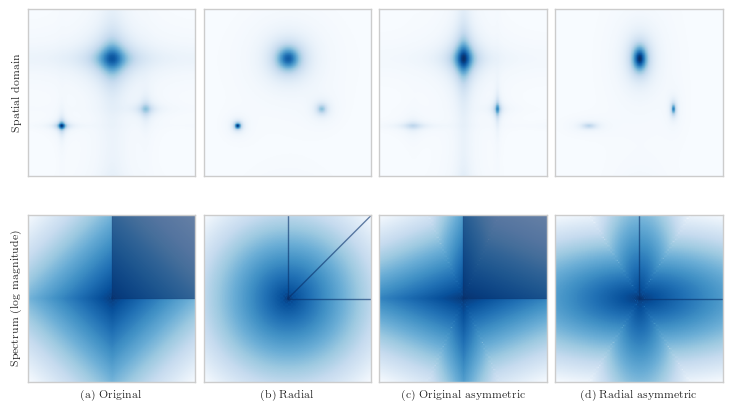

In [18]:
from matplotlib import patches
from matplotlib import lines
    
def format_2D_images(ax, title='', label=''):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=style['fontsize'], family='serif', y=-0.13)
    ax.set_ylabel(label, fontsize=style['fontsize'], family='serif')

def plot_fri_column(vpw_fri, column, gs, T, M, N, region='square', title=''):

    y_grid, x_grid = np.meshgrid(np.linspace(0, T, N),np.linspace(0, T, M))
    f_u = 2*np.pi*np.fft.fftfreq(int(M), T/M)/T
    f_v = 2*np.pi*np.fft.fftfreq(int(N), T/N)/T
    v_grid, u_grid = np.meshgrid(np.fft.fftshift(f_v), np.fft.fftshift(f_u))
    spectrum_2D = vpw_fri.evaluate_Fourier_domain(f_u, f_v)
    
    vmax = np.max(np.log(np.fft.fftshift(abs(spectrum_2D))))
    vmin = np.min(np.log(np.fft.fftshift(abs(spectrum_2D))))

    vpw_2D_ifft_ax = plt.subplot(gs[0,column])
    vpw_2D_ifft_ax.matshow(np.real(np.fft.ifft2(spectrum_2D)), cmap=plt.cm.Blues)
    
    vpw_2D_freq_ax = plt.subplot(gs[1,column])
    
    if region=='square':
        hatch_pattern = '\\'
        p = patches.Rectangle((M/2, 0), M/2+10, N/2, hatch='', fill=True, edgecolor='#08306b', facecolor='#08306b', alpha=0.6)
        vpw_2D_freq_ax.add_patch(p)
        
    elif region=='lines':
        l = lines.Line2D([M/2, M/2], [M/2, 0], ls='solid', color='#08306b', alpha=0.6)
        vpw_2D_freq_ax.add_line(l)
        l = lines.Line2D([M/2, M], [M/2, M/2], ls='solid', color='#08306b', alpha=0.6)
        vpw_2D_freq_ax.add_line(l)
        
    elif region=='lines_diag':
        l = lines.Line2D([M/2, M/2], [M/2, 0], ls='solid', color='#08306b', alpha=0.6)
        vpw_2D_freq_ax.add_line(l)
        l = lines.Line2D([M/2, M], [M/2, M/2], ls='solid', color='#08306b', alpha=0.6)
        vpw_2D_freq_ax.add_line(l)
        l = lines.Line2D([M/2, M], [M/2, 0], ls='solid', color='#08306b', alpha=0.6)
        vpw_2D_freq_ax.add_line(l)
        
    
    vpw_2D_freq_ax.matshow(np.log(np.fft.fftshift(np.abs(spectrum_2D))), cmap=plt.cm.Blues, vmax=vmax, vmin=vmin)
    
    
    if column == 0:
        format_2D_images(vpw_2D_freq_ax, title=title,  label='Spectrum (log magnitude)')
        format_2D_images(vpw_2D_ifft_ax, title='', label='Spatial domain')
        
    else:
        format_2D_images(vpw_2D_freq_ax, title=title,  label='')
        format_2D_images(vpw_2D_ifft_ax, title='', label='')

    
def plot_fri_2D():

    gs = gridspec.GridSpec(2, 4)
    
    tk2  = np.array([[ 0.6,  0.7], [ 0.7,  0.2], [ 0.3,  0.5]])
    tk = tk2[:,1]
    rk  = np.array([ 0.035,  0.02,   0.085])
    ck  = np.array([ 0.5,  0.4,  6.0])
    T = 1.0
    
    fig = plt.figure(figsize=style['4fig_2col'], dpi=style['dpi'])
    fig.patch.set_facecolor('white')
    plt.subplots_adjust(hspace = 0.05, wspace = 0.05)
    
    #2D VPW, 'normal'
    M = 400.0
    N = 400.0

    vpw_fri2 = VPW_FRI_2D(tk2, rk, ck, T/M, T/N)
    plot_fri_column(vpw_fri2, 0, gs, T, M, N, title='(a) Original')
    
    
    #2D VPW, radial
    vpw_fri3 = VPW_FRI_2D_Radial(tk2, rk, ck, T/M, T/N)
    plot_fri_column(vpw_fri3, 1, gs, T, M, N, region='lines_diag', title='(b) Radial')

    #Anisotropic
    rk  = np.array([[0.035, 0.015],  [0.02, 0.05],   [0.085, 0.05]])
    
    vpw_fri4 = VPW_FRI_2D(tk2, rk, ck, T/M, T/N)
    plot_fri_column(vpw_fri4, 2, gs, T, M, N, region='square', title='(c) Original asymmetric')
    
    vpw_fri5 = VPW_FRI_2D_Radial(tk2, rk, ck, T/M, T/N)
    plot_fri_column(vpw_fri5, 3, gs, T, M, N, region='lines', title='(d) Radial asymmetric')
    
    

plot_fri_2D()

plt.subplots_adjust(hspace = 0.0, wspace = 0.05, left=0.03, right=1, top=1.03, bottom=0.0)
if mode=='paper':
    plt.savefig('../figures/2D_pulses.pdf', pad=0)

### Noisy case: experiments with the 2D model

* $K = 3$

* We use $20 \times 20$ Fourier coefficients

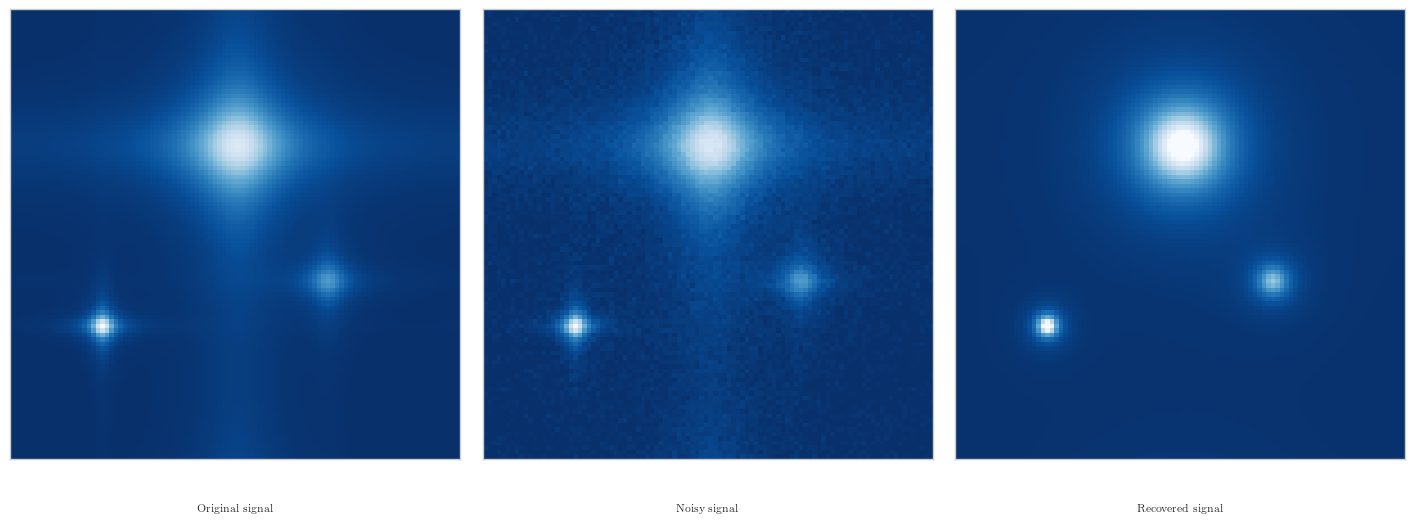

In [36]:
from fri import *
from ipywidgets import interact

def plot_fri_noise_2D(snr):

    gs = gridspec.GridSpec(1, 3)
    
    tk2  = np.array([[ 0.6,  0.7], [ 0.7,  0.2], [ 0.3,  0.5]])
    rk  = np.array([ 0.035,  0.02,   0.085])
    #ck  = np.array([ 0.75,  0.7,  5.0])
    ck  = np.array([ 0.5,  0.4,  6.0])
    T = 1.0
    K = 3
    
    fig = plt.figure(figsize=(18, 6), dpi=300)
    fig.patch.set_facecolor('white')
    plt.subplots_adjust(hspace = 0.05, wspace = 0.05)
    
    #2D VPW, 'normal'
    M = 100.0
    N = 100.0
    
    vpw_fri2 = VPW_FRI_2D(tk2, rk, ck, T/M, T/N)
    y_grid, x_grid = np.meshgrid(np.linspace(0, T, N),np.linspace(0, T, M))
    f_u = 2*np.pi*np.fft.fftfreq(int(M), T/M)/T
    f_v = 2*np.pi*np.fft.fftfreq(int(N), T/N)/T
    v_grid, u_grid = np.meshgrid(np.fft.fftshift(f_v), np.fft.fftshift(f_u))
    spectrum_2D = vpw_fri2.evaluate_Fourier_domain(f_u, f_v)
    
    signal_2D = np.real(np.fft.ifft2(spectrum_2D))
    
    vmax = np.max(signal_2D)
    vmin = np.min(signal_2D)

    signal_power = np.linalg.norm(signal_2D)**2/(M*N)
    noise_power  = signal_power/np.power(10, snr/10.0)

    signal_noisy   = signal_2D + np.random.normal(0,sqrt(noise_power),(int(M), int(N)))
    spectrum_noisy = np.fft.fft2(signal_noisy)
    
    n_coeffs = 20
    
    fri_estimated = FRI_estimator(K, T, T/N, T/N).estimate_parameters_2D_multi_rows(spectrum_noisy[:n_coeffs, :n_coeffs], f_u[:n_coeffs], f_v[:n_coeffs])
    signal_estimated =  np.real(np.fft.ifft2(fri_estimated.evaluate_Fourier_domain(f_u, f_v)))

    vpw_2D_ax = plt.subplot(gs[0,0])
    vpw_2D_ax.matshow(signal_2D, cmap=plt.cm.Blues_r)
    format_2D_images(vpw_2D_ax, title='Original signal')
    
    vpw_2D_noisy = plt.subplot(gs[0,1])
    vpw_2D_noisy.matshow(signal_noisy, cmap=plt.cm.Blues_r, vmin=vmin, vmax=vmax)
    format_2D_images(vpw_2D_noisy, title='Noisy signal')
    
    vpw_2D_rec = plt.subplot(gs[0,2])
    vpw_2D_rec.matshow(signal_estimated, cmap=plt.cm.Blues_r, vmin=vmin, vmax=vmax)
    format_2D_images(vpw_2D_rec, title='Recovered signal')
    
    
interact(plot_fri_noise_2D, snr=(-10,50));

### Noisy case: experiments with the 2D <span style="color:#2a76dd">radial</span> model

* $K = 3$

* We use $2 \times 40$ Fourier coefficients

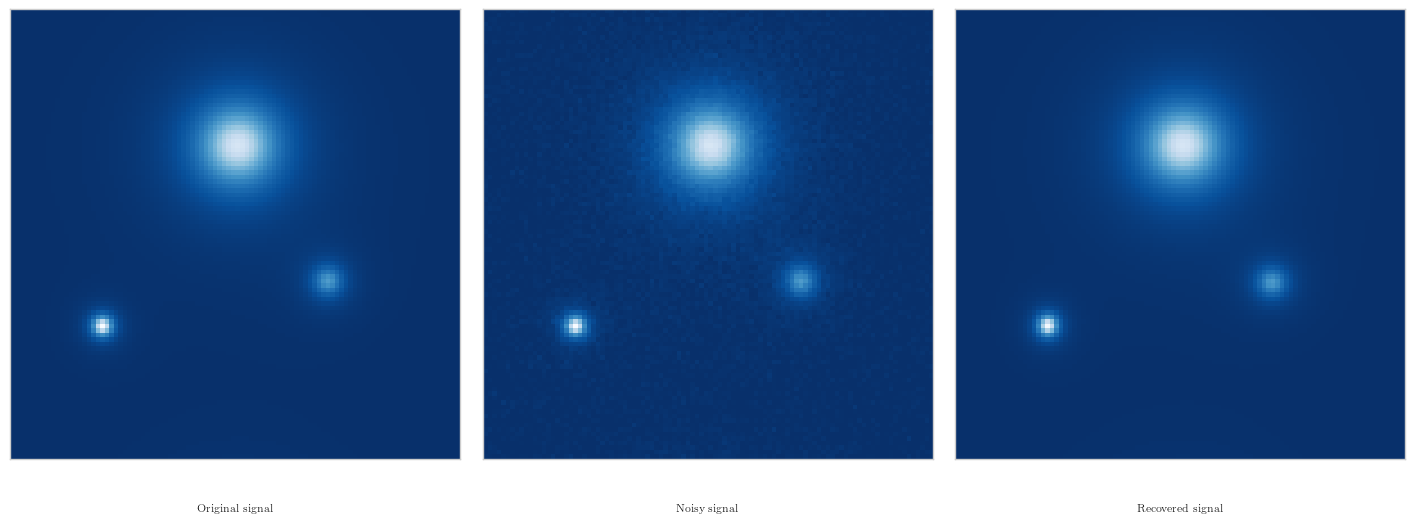

In [20]:
def plot_fri_noise_2D(snr):

    gs = gridspec.GridSpec(1, 3)
    
    tk2  = np.array([[ 0.6,  0.7], [ 0.7,  0.2], [ 0.3,  0.5]])
    rk  = np.array([ 0.035,  0.02,   0.085])
    #ck  = np.array([ 0.75,  0.7,  5.0])
    ck  = np.array([ 0.5,  0.4,  6.0])
    T = 1.0
    K = 3
    
    fig = plt.figure(figsize=(18, 6), dpi=300)
    fig.patch.set_facecolor('white')
    plt.subplots_adjust(hspace = 0.05, wspace = 0.05)
    
    #2D VPW, 'normal'
    M = 100.0
    N = 100.0
    
    vpw_fri2 = VPW_FRI_2D_Radial(tk2, rk, ck, T/M, T/N)
    y_grid, x_grid = np.meshgrid(np.linspace(0, T, N),np.linspace(0, T, M))
    f_u = 2*np.pi*np.fft.fftfreq(int(M), T/M)/T
    f_v = 2*np.pi*np.fft.fftfreq(int(N), T/N)/T
    v_grid, u_grid = np.meshgrid(np.fft.fftshift(f_v), np.fft.fftshift(f_u))
    spectrum_2D = vpw_fri2.evaluate_Fourier_domain(f_u, f_v)
    
    signal_2D = np.real(np.fft.ifft2(spectrum_2D))
    
    vmax = np.max(signal_2D)
    vmin = np.min(signal_2D)

    signal_power = np.linalg.norm(signal_2D)**2/(M*N)
    noise_power  = signal_power/np.power(10, snr/10.0)

    signal_noisy   = signal_2D + np.random.normal(0,sqrt(noise_power),(int(M), int(N)))
    spectrum_noisy = np.fft.fft2(signal_noisy)
    
    n_coeffs = 40
    
    fri_est = FRI_estimator(K, T, T/N, T/N).estimate_parameters_2D_single_row(spectrum_noisy[:n_coeffs, :n_coeffs], f_u[:n_coeffs], f_v[:n_coeffs])
    fri_estimated = VPW_FRI_2D_Radial(fri_est.tk, fri_est.rk, fri_est.ck, T/M, T/N)
    signal_estimated =  np.real(np.fft.ifft2(fri_estimated.evaluate_Fourier_domain(f_u, f_v)))

    vpw_2D_ax = plt.subplot(gs[0,0])
    vpw_2D_ax.matshow(signal_2D, cmap=plt.cm.Blues_r)
    format_2D_images(vpw_2D_ax, title='Original signal')
    #vpw_2D_ax = plt.subplot(gs[0,0], projection='3d')
    #vpw_2D_ax.plot_surface(x_grid, y_grid, signal_2D, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.Blues)
    #format_2D(vpw_2D_ax, title='Original signal')
    
    vpw_2D_noisy = plt.subplot(gs[0,1])
    vpw_2D_noisy.matshow(signal_noisy, cmap=plt.cm.Blues_r, vmin=vmin, vmax=vmax)
    format_2D_images(vpw_2D_noisy, title='Noisy signal')
    #vpw_2D_noisy = plt.subplot(gs[0,1], projection='3d')
    #vpw_2D_noisy.plot_surface(x_grid, y_grid, signal_noisy, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.Blues, vmin=vmin, vmax=vmax)
    #format_2D(vpw_2D_noisy, title='Noisy signal')
    
    vpw_2D_rec = plt.subplot(gs[0,2])
    vpw_2D_rec.matshow(signal_estimated, cmap=plt.cm.Blues_r, vmin=vmin, vmax=vmax)
    format_2D_images(vpw_2D_rec, title='Recovered signal')
    
    
interact(plot_fri_noise_2D, snr=(-10,50));

## V. Pulses with variable width - on the sphere

### Sampling strategies on the sphere

Fig. 11

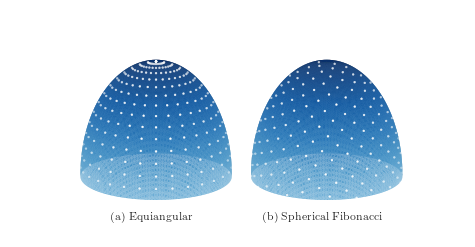

In [22]:
from samplers import *
from mpl_toolkits.mplot3d import axes3d
from scipy.spatial import Delaunay

def plot_sampling_points(points, sphere_points, ax, title=None):

    triangulation = Delaunay(np.array((sphere_points.x.flatten(), sphere_points.y.flatten())).T)

    #Hack: select only the points that are in front of the sphere
    idx = np.where(np.logical_or(points.phi <= np.pi*0.5, points.phi >= np.pi*1.5))
    
    ax.scatter(points[idx].x, points[idx].y, points[idx].z, s=2, color='white')
    
    collec = ax.plot_trisurf(sphere_points.x.flatten()-0.01, sphere_points.y.flatten()+0.001, sphere_points.z.flatten(),
                    triangles=triangulation.simplices, cmap=plt.cm.Blues, linewidth=0, vmin=-1.0, vmax=1.0, antialiased=True)
    
    collec.set_alpha(1.0)
    
    ax.view_init(20, 0)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([0,1])
    
    # Get rid of the panes                          
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines                         
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    
    ax.patch.set_alpha(0.0)
    
    if title is not None:
        ax.set_title(title, fontsize=style['fontsize'], family='serif', y=0.05)
       

gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(3.5, 1.75), dpi=style['dpi'])
fig.patch.set_facecolor('white')
plt.subplots_adjust(hspace = 0.01, wspace = 0.0)

samp1_ax = plt.subplot(gs[0,0], projection='3d')
samp2_ax = plt.subplot(gs[0,1], projection='3d')

sampling1 = UniformAngularGridSampler().sample(15, 30)
sampling2 = FibonacciSphereSampler().sample(300)

sampling_sphere = UniformAngularGridSampler().sample(150, 150)
#sampling_sphere = UniformAngularGridSampler().sample(30, 30)

plot_sampling_points(sampling1, sampling_sphere, samp1_ax, title='(a) Equiangular')
plot_sampling_points(sampling2, sampling_sphere, samp2_ax, title='(b) Spherical Fibonacci')

plt.subplots_adjust(hspace=0.01, wspace=-0.4, left=-0.15, right=1.15, top=1.25, bottom=-0.05)

if mode=='paper':
    plt.savefig('../figures/sampling_schemes.pdf', pad=0)

### Representation of spherical signals

Fig. 12

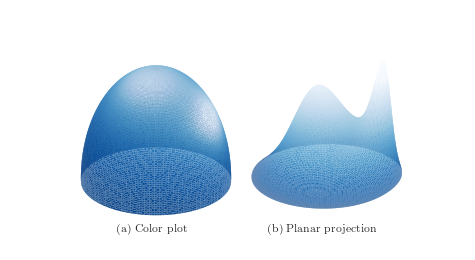

In [21]:
from spherical_fri import *
from sh_toolbox import *
from samplers import *
import matplotlib.gridspec as gridspec


def plot_spherical_signal(spectrum, mode, ax, title=''):
    
    light = UniformAngularGridSampler().sample(100,100)
    spectrum.show_spherical(title='', case='complex', light=light, mode=mode, ax=ax)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([0,1])
    
    # Get rid of the panes                          
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines                         
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    
    ax.patch.set_alpha(0.0)
    
    if title is not None:
        ax.set_title(title, fontsize=style['fontsize'], family='serif', y=0.05)
        
#Generate a VPW-FRI signal        
t_k = np.array([0.3, 0.85])
p_k = np.array([4.8, 0.2])
c_k = np.array([4.0, 2.0])/3.0
r_k = np.array([0.5, 0.25])

L = 30

spherical_vpw = Spherical_FRI(t_k, p_k, c_k, r_k)

vpw_spectrum = spherical_vpw.vpw_sh(L=L)

#Plot data
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=style['2fig_1col'], dpi=style['dpi'])
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

sphere_ax = plt.subplot(gs[0,0], projection='3d')
plane_ax  = plt.subplot(gs[0,1], projection='3d')

plot_spherical_signal(vpw_spectrum, mode='spherical', ax=sphere_ax, title='(a) Color plot')
plot_spherical_signal(vpw_spectrum, mode='uv', ax=plane_ax, title='(b) Planar projection')

plt.subplots_adjust(hspace=0.01, wspace=-0.4, left=-0.15, right=1.15, top=1.15, bottom=-0.05)

if mode=='paper':
    plt.savefig('../figures/spherical_representation.pdf', pad=0)

## Application I: ECG MODELING

### ECG record

Fig. 13

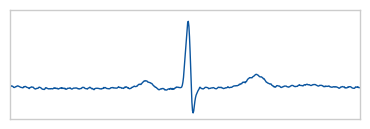

In [100]:
def plot_ecg_pulse():
    
    data_ecg = genfromtxt('data/ecg.dat', delimiter=',')

    time = data_ecg[:,0]
    ecg  = data_ecg[:,1]
    
    #Figure with 3 subfigures on one column
    fig = plt.figure(figsize=style['3fig_1col_square'], dpi=style['dpi'] )
    
    plt.plot(ecg)
    plt.xticks([])
    plt.yticks([])
    plt.xlim([0, len(ecg)])
        
plot_ecg_pulse()

save_figure_square(path='../figures/ecg_pulses.pdf')


### ECG acquisition

Fig. 14

__Remark:__ the algorithm developed for ECG acquisition and compression is owned by Qualcomm Inc. You can request it by emailing the main author, who will send you a licence agreement form to sign before sending you the code.

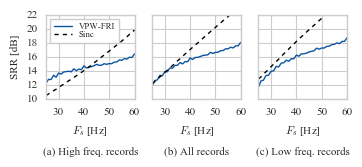

In [123]:
import scipy.io

def plot_data(path, ax=None, left=False, right=False, title=''):

    data_compression = scipy.io.loadmat(path)

    lowpass_snrs = data_compression['lowpass_snrs']
    fri_snrs = data_compression['fri_snrs']
    sampling_freqs = data_compression['sampling_freqs']

    if ax is None:
        plt.figure(figsize=style['3fig_1col_square'], dpi=style['dpi'])
        ax = plt.gca()
    
    ax.plot(sampling_freqs.flatten(), np.mean(fri_snrs, axis=0), label='VPW-FRI')
    ax.plot(sampling_freqs.flatten(), np.mean(lowpass_snrs, axis=0), '--', dashes=[3,3], c='k', label='Sinc')
    
    ax.set_ylim([10,22])
    if left:
        ax.set_ylabel("SRR [dB]", fontsize=style['fontsize'], family='serif')
        legend = ax.legend(loc='upper center')
        legend.get_frame().set_facecolor('#FFFFFF')
        
        style_legend(ax, loc=2)
        
    else:
        ax.set_yticklabels([])

        
   
    
    ax.set_xticks([30,40,50,60])
    ax.set_xlabel("$F_s$ [Hz]", fontsize=style['fontsize'], family='serif')
    
    ax.set_title(title, y=-0.75, fontsize=style['fontsize'], family='serif')

    

    
fig = plt.figure(figsize=style['3fig_1col'], dpi=style['dpi'])
fig.patch.set_facecolor('white')

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

plot_data('data/compression_vs_sinc_bad_25.dat', ax=ax3, title='(c) Low freq. records')
plot_data('data/compression_vs_sinc_average_25.dat', ax=ax2, title='(b) All records')
plot_data('data/compression_vs_sinc_good_25.dat', ax=ax1, left=True, title='(a) High freq. records')

plt.subplots_adjust(left=0.12, right=0.98, top=0.96, bottom=0.40)

if mode=='paper':
    plt.savefig('../figures/ecg_acquisition_25.pdf')


### ECG compression

Fig. 15

__Remark:__ the algorithm developed for ECG acquisition and compression is owned by Qualcomm Inc. You can request it by emailing the main author, who will send you a licence agreement form to sign before sending you the code.

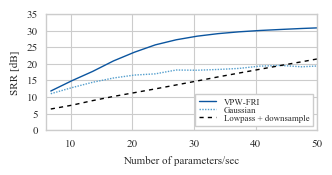

In [124]:
import scipy.io


data_gaussian = scipy.io.loadmat('data/compression_gaussian.dat')
data_fri      = scipy.io.loadmat('data/compression_vs_samples.dat')
rate          = scipy.io.loadmat('data/rate.dat')['average_rate'].flatten()

lowpass_snrs = data_fri['lowpass_snrs']
fri_snrs = data_fri['fri_snrs']
n_samples_fri = data_fri['Ks']

gaussian_snrs = data_gaussian['fri_snrs']
n_samples_gaussian = data_gaussian['Ks']


fig = plt.figure(figsize=style['3fig_1col'], dpi=style['dpi'])
fig.patch.set_facecolor('white')

plt.plot(4/3*rate, np.mean(fri_snrs, axis=0), c='#0B559F', label='VPW-FRI')
plt.plot(rate, np.mean(gaussian_snrs[:,:14], axis=0), ':', dashes=[1,1], c='#539ECD', label='Gaussian')
plt.plot(rate, np.mean(lowpass_snrs, axis=0), '--', c='k', dashes=[3,3], label='Lowpass + downsample')
plt.xlim([6,50])
plt.ylim([0,35])
plt.xticks([10,20,30,40,50])
style_legend(plt.gca(), loc=4)

plt.ylabel("SRR [dB]", fontsize=style['fontsize'], family='serif')
plt.xlabel("Number of parameters/sec", fontsize=style['fontsize'], family='serif')

if mode=='paper':
    plt.savefig('../figures/ecg_compression.pdf', bbox_inches='tight')



### ECG compression on record 123

Fig. 16

__Remark:__ the algorithm developed for ECG acquisition and compression is owned by Qualcomm Inc. You can request it by emailing the main author, who will send you a licence agreement form to sign before sending you the code.

('SNR FRI: ', 22.340311832086719)
('SNR Gaussian: ', 14.014024470298382)


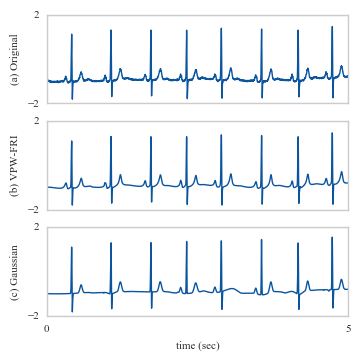

In [140]:
import scipy.io

def plot_data_vert(time, data, ax=None, bottom=False, title=''):

    idx = np.arange(0, 3600)
    
    time = np.array(time)
    data = np.array(data)
    ax.plot(time[idx]-time[0], data[idx], label=title)

    ax.set_yticks([-2,2])
    ax.set_xticks([0,10])
    
    if bottom:
        ax.set_xlabel("time (sec)", fontsize=style['fontsize'], family='serif')
        ax.set_xticklabels([0,5,10])
        
    else:
        ax.set_xticklabels([])
            
    ax.set_ylabel(title, fontsize=style['fontsize'], family='serif')
    

    
fig = plt.figure(figsize=style['square'], dpi=style['dpi'])
#fig.patch.set_facecolor('white')

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ecg_fri = scipy.io.loadmat('data/signal_123_fri.dat')
ecg_gaussian = scipy.io.loadmat('data/signal_123_gaussian.dat')
time = ecg_gaussian['time'].flatten()


plot_data_vert(time, ecg_fri['rawSignal'].flatten(), ax=ax1, title='(a) Original')
plot_data_vert(time, ecg_fri['recoveredSignal'].flatten(), ax=ax2, title='(b) VPW-FRI')
plot_data_vert(time, ecg_gaussian['recoveredSignal'].flatten(), ax=ax3, title='(c) Gaussian', bottom=True)

ori = ecg_fri['rawSignal'].flatten()
mea = np.mean(ori)
ori = ori-mea

vpw = ecg_fri['recoveredSignal'].flatten()-mea
gau = ecg_gaussian['recoveredSignal'].flatten()-mea
print('SNR FRI: ', 20*np.log10( np.linalg.norm(ori)/np.linalg.norm(ori-vpw) ))
print('SNR Gaussian: ', 20*np.log10( np.linalg.norm(ori)/np.linalg.norm(ori-gau) ))


plt.subplots_adjust(left=0.12, right=0.98, top=0.96, bottom=0.10)

if mode=='paper':
    plt.savefig('../figures/ecg_compression_123.pdf')

## Application II: BRDF Acquisition

### Modeling of glossy materials

Fig. 18

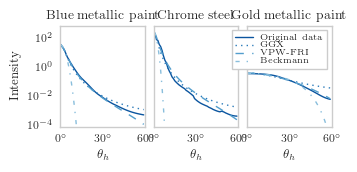

In [26]:
import matplotlib.pyplot as plt

%autoreload

from merlFunctions import *

def beckmann(tan_theta_d, alpha, c=1.0):
    cos_theta = np.cos(np.arctan(tan_theta_d))
    
    return c*1.0/(np.pi*alpha**2*cos_theta**4)*np.exp(-tan_theta_d**2/(alpha**2))
    
def ggx(tan_theta_d, alpha, c=1.0):
    cos_theta = np.cos(np.arctan(tan_theta_d))
    
    return c*alpha**2/(np.pi*cos_theta**4*(alpha**2 + tan_theta_d**2)**2)
    
def vpw_fri(tan_theta_d, alpha, c=1.0):
    return c*alpha/(alpha**2 + tan_theta_d**2)

def fit_plot_data(theta_d, data, ax, legend=True, ylabel=True, title=''):
    
    range = 60

    theta_d = theta_d[:range]
    data = data[:range]
    
    tan_theta_d = np.tan(np.radians(theta_d))

    best_vals_beckmann, cov = optimize.curve_fit(beckmann, tan_theta_d, data, p0=[0.001, 1.0])
    alpha_beckmann = best_vals_beckmann[0]
    c_beckmann     = best_vals_beckmann[1]
    
    best_vals_ggx, cov = optimize.curve_fit(ggx, tan_theta_d, data, p0=[0.001, 1.0])
    alpha_ggx = best_vals_ggx[0]
    c_ggx     = best_vals_ggx[1]
    
    best_vals_fri, cov = optimize.curve_fit(vpw_fri, tan_theta_d, np.sqrt(data), p0=[0.001, 1.0])
    alpha_fri = best_vals_fri[0]
    c_fri     = best_vals_fri[1]
    

    
    ax.semilogy(theta_d, data, label='Original data')
    ax.plot(theta_d, ggx(tan_theta_d, alpha_ggx, c_ggx), ':', label='GGX')
    ax.plot(theta_d, vpw_fri(tan_theta_d, alpha_fri, c_fri)**2, '--', label='VPW-FRI')
    ax.plot(theta_d, beckmann(tan_theta_d, alpha_beckmann, c_beckmann), '-.', label='Beckmann')
    ax.set_ylim([10**(-4), 10**3])
    ax.set_xlabel(r"$\theta_h$")
    ax.set_title(title)
    if legend:
        style_legend(ax, loc=1)
    if ylabel:
        ax.set_ylabel('Intensity')
        ax.yaxis.set_major_locator(LogLocator(base = 100))
    else:
        ax.axes.get_yaxis().set_ticks([])
        
    ax.axes.get_xaxis().set_ticks([0, 30, 60])
    ax.axes.get_xaxis().set_ticklabels(['$0^\circ$', '$30^\circ$', '$60^\circ$'])
    ax.grid(b=False)

#fig = plt.figure(figsize=(18, 6), dpi=300)
fig = plt.figure(figsize=style['3fig_1col_square'], dpi=style['dpi'])
plt.subplots_adjust(hspace = 0.05, wspace = 0.1)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

merl_chrome  = readMERLBRDF('/Users/gbaechle/EPFL/PhD/BRDF Data and Rendering Engines/MERL/chrome.binary')
chrome_theta_d = merl_chrome[0,:,0,0]
theta_d = np.linspace(0,89,90)

data1  = readMERLBRDF('MERL/blue-metallic-paint2.binary')
data2  = readMERLBRDF('MERL/chrome-steel.binary')
data3  = readMERLBRDF('MERL/gold-metallic-paint.binary')

fit_plot_data(theta_d, data1[90,:,0,0], ax1, legend=False, ylabel=True, title='Blue metallic paint')
fit_plot_data(theta_d, data2[90,:,0,0], ax2, legend=False, ylabel=False, title='Chrome steel')
fit_plot_data(theta_d, data3[90,:,0,0], ax3, legend=True, ylabel=False, title='Gold metallic paint')

if mode=='paper':
    plt.savefig('../figures/brdf_models.pdf', bbox_inches='tight')

### Specularity localization on the plane

Fig. 19


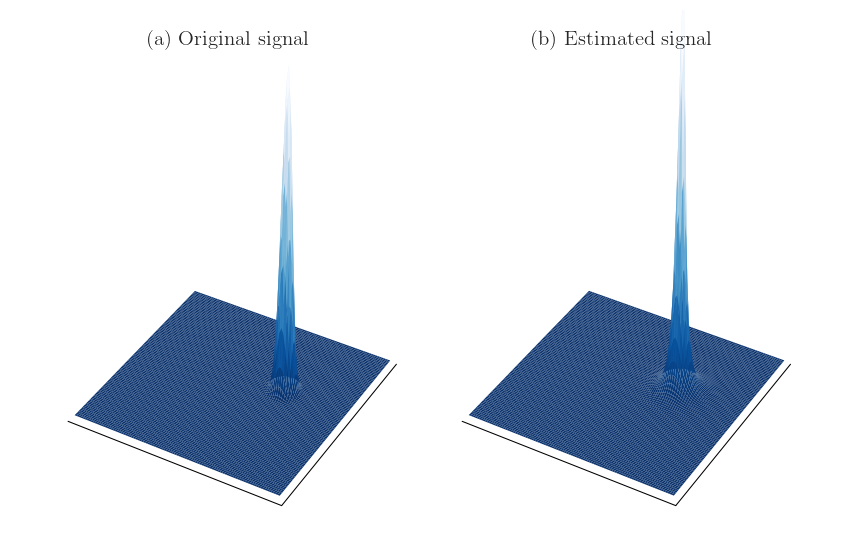

In [28]:
%autoreload 2

from brdf import *
from fri import *

gs = gridspec.GridSpec(1, 2)
K = 1
T = 1.0
M = 100
N = 100

kd = 0.0
ks = 0.01
alpha = 0.035

def format_2D(ax, title='', label=''):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.w_zaxis.line.set_lw(0.)
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])
    ax.set_zlabel(label, fontsize=15)
    ax.set_title(title, fontsize=15)

#sample the hemisphere for the vector omega_i 
light  = Uniform2DGridSampler().sample(M,N)

view   = Coordinates(0.0, 0.0)
normal = Coordinates(0.2, 0.1)

brdf = BrdfRecord(light, view, Ward(kd, ks, alpha).eval_cos(light, view, normal))

f_u = 2*np.pi*np.fft.fftfreq(M, T/M)/T
f_v = 2*np.pi*np.fft.fftfreq(N, T/N)/T

v_grid, u_grid = np.meshgrid(np.fft.fftshift(f_v), np.fft.fftshift(f_u))

signal_2D   = brdf.intensity.reshape((M,N))
spectrum_2D = np.fft.fft2(signal_2D)

#Signal
x_grid = light.x.reshape((M,N))
y_grid = light.y.reshape((M,N))

vpw_2D_ax = plt.subplot(gs[0,0], projection='3d')
vpw_2D_ax.plot_surface(x_grid, y_grid, signal_2D, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.Blues_r)
format_2D(vpw_2D_ax, title='(a) Original signal')
vpw_2D_ax.set_zlim([0, 0.5])

#Reconstruction
fri_estimator = FRI_estimator(K, T, T/M, T/N)
#extract positive frequencies
id1, id2 = np.meshgrid(np.where(f_v >= 0)[0], np.where(f_u >= 0)[0])
n_samples = 50
id1 = id1[:n_samples, :n_samples]; id2 = id2[:n_samples,:n_samples]
spectrum_used = spectrum_2D[id2, id1]
fri_est = fri_estimator.estimate_parameters_2D_single_row(spectrum_used, f_u[id2[:,0]],  f_v[id1[0,:]])

#refine ck estimation
old_ck = fri_est.ck
fri_est = VPW_FRI_2D_Radial(fri_est.tk, fri_est.rk, np.ones(K), fri_est.T1, fri_est.T2)
time_domain = np.fft.ifft2(fri_est.evaluate_Fourier_domain(f_u, f_v))

ck = np.real( np.dot(time_domain.flatten().conj(), signal_2D.flatten())/np.dot(time_domain.flatten().conj(), time_domain.flatten()) )

fri_est.ck = ck
fri_est.ck = old_ck

vpw_2D_ifft_ax = plt.subplot(gs[0,1], projection='3d')
vpw_2D_ifft_ax.plot_surface(x_grid, y_grid, np.fft.ifft2(fri_est.evaluate_Fourier_domain(f_u, f_v)), rstride=1, cstride=1, linewidth=0, cmap=plt.cm.Blues_r)
format_2D(vpw_2D_ifft_ax, title='(b) Estimated signal')
vpw_2D_ifft_ax.set_zlim([0, 0.5])

plt.subplots_adjust(hspace=0.01, wspace=-0.1, left=-0.15, right=1.15, top=1.15, bottom=-0.05)

if mode=='paper':
    plt.savefig('../figures/brdf_2d_fit_2.pdf', pad=0)

### Specularity representation

Fig. 21

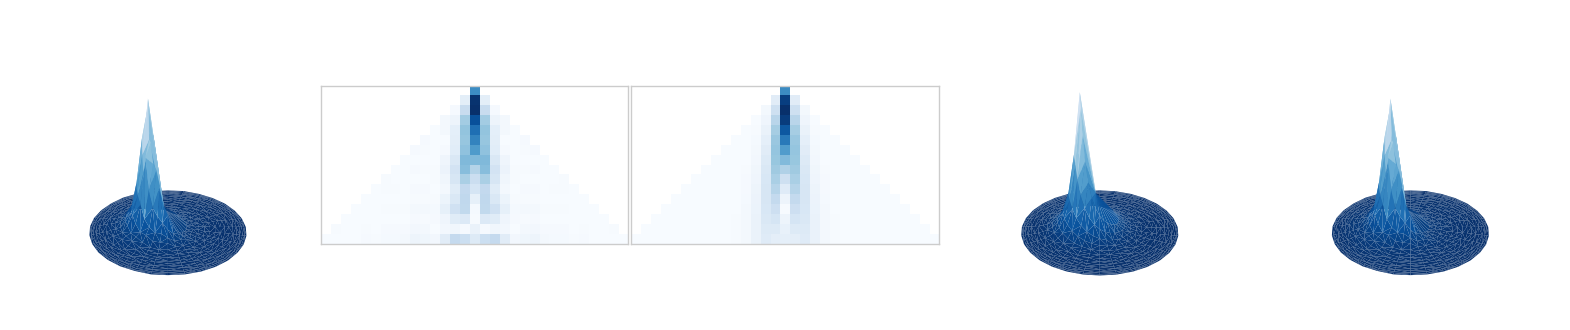

In [30]:
from brdf import BrdfRecord
from samplers import *
from spherical_fri import *
from sh_toolbox import *

import file_operations
    
def load_brdf(path, pixel_index):
    
    btf = file_operations.load_btf(path)
    return BrdfRecord(btf.omega_i, btf.omega_o, btf.values[:,pixel_index,2].reshape(btf.nbre_omega_i, -1))

def remove_axis(ax):
    ax.patch.set_alpha(0.0)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    
    # Get rid of the panes                          
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines                         
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    
def remove_axis_2d(ax):
    ax.patch.set_alpha(0.0)
    ax.set_xticks([])
    ax.set_yticks([])

def spherical_vpw_fri(brdf):

    #parameters
    plot_mode   = 'uv'
    lmax        = 15
    n_phi =   30
    n_theta = 15
    drop_factor_phi   = 1
    drop_factor_theta = 1
    K   = 1
    L = 15

    omega = brdf.omega_i

    indices = np.arange(0,brdf.omega_i.n/drop_factor_phi)*drop_factor_phi
    for t in range(n_theta):
        if not t % drop_factor_theta == 0:
            indices = np.delete(indices, np.arange(n_phi/drop_factor_phi*t, n_phi/drop_factor_phi*(t+1)) )

    sh_complex  = expand_sh_complex(brdf.intensity[indices], omega.theta[indices], omega.phi[indices], lmax=lmax, lambd=1)

    brdf_down   = BrdfRecord(brdf.omega_i[indices], brdf.omega_o, brdf.intensity[indices])

    gs = gridspec.GridSpec(1, 5)

    fig = plt.figure(figsize=(20, 4), dpi=300)
    fig.patch.set_facecolor('white')
    plt.subplots_adjust(hspace = 0.01, wspace = 0.01)

    brdf_ax = plt.subplot(gs[0,4], projection='3d')
    brdf_down_ax = plt.subplot(gs[0,0], projection='3d')
    brdf_down_spec_ax = plt.subplot(gs[0,1])
    brdf_est_spec_ax = plt.subplot(gs[0,2])
    brdf_est_ax = plt.subplot(gs[0,3], projection='3d')

    brdf.plot_data(ax=brdf_ax, values=brdf.intensity, mode=plot_mode)
    brdf_down.plot_data(ax=brdf_down_ax, values=brdf_down.intensity, mode=plot_mode)

    #Compute the Fourier spectrum of the spherical signal
    sh_complex  = expand_sh_complex(brdf.intensity[indices], omega.theta[indices], omega.phi[indices], lmax=lmax, lambd=1)
    sh_complex.show_spectrum(title='', colorbar=False, ax=brdf_down_spec_ax)

    #FRI estimation
    fri_estimator = FRI_estimator(K)

    fri_est = fri_estimator.estimate_parameters_diracs_sectoral(sh_complex)
    vpw_spectrum_est = fri_est.vpw_sh(L=L+1)
    vpw_spectrum_est_high = fri_est.vpw_sh(L=80)

    vpw_spectrum_est = Spherical_Function_Spectrum(vpw_spectrum_est.matrix)
    vpw_spectrum_est.show_spectrum(title='', colorbar=False, ax=brdf_est_spec_ax)
    vpw_spectrum_est_high.show_spherical(title='', light=brdf.omega_i,  mode=plot_mode, ax=brdf_est_ax)

    remove_axis(brdf_ax)
    remove_axis(brdf_down_ax)
    remove_axis_2d(brdf_down_spec_ax)
    remove_axis_2d(brdf_est_spec_ax)
    remove_axis(brdf_est_ax)

path = '../dataset'
#select one pixel
pixel_index = 88259
brdf = load_brdf(path, pixel_index)    

spherical_vpw_fri(brdf)

if mode=='paper':
    plt.savefig('../figures/brdf_representation2.pdf')

### Model mismatch

Fig. 22

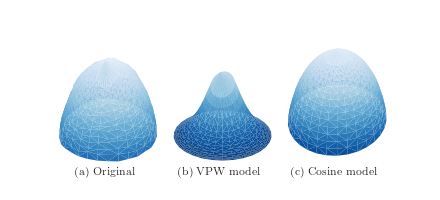

In [31]:
def spherical_vpw_fri_diffuse(brdf):

    #parameters
    plot_mode   = 'uv'
    lmax        = 15
    n_phi =   30
    n_theta = 15
    drop_factor_phi   = 5
    drop_factor_theta = 5
    K   = 1
    L = 15

    omega = brdf.omega_i

    indices = np.arange(0,brdf.omega_i.n/drop_factor_phi)*drop_factor_phi
    for t in range(n_theta):
        if not t % drop_factor_theta == 0:
            indices = np.delete(indices, np.arange(n_phi/drop_factor_phi*t, n_phi/drop_factor_phi*(t+1)) )

    sh_complex  = expand_sh_complex(brdf.intensity[indices], omega.theta[indices], omega.phi[indices], lmax=lmax, lambd=1)

    brdf_down   = BrdfRecord(brdf.omega_i[indices], brdf.omega_o, brdf.intensity[indices])

    gs = gridspec.GridSpec(1, 3)

    fig = plt.figure(figsize=style['3fig_1col'], dpi=style['dpi'])
    fig.patch.set_facecolor('white')
    plt.subplots_adjust(hspace = 0.01, wspace = 0.01)

    brdf_ax = plt.subplot(gs[0,0], projection='3d')
    brdf_est_ax = plt.subplot(gs[0,1], projection='3d')
    brdf_diffuse_ax = plt.subplot(gs[0,2], projection='3d')

    brdf.plot_data(ax=brdf_ax, values=brdf.intensity, mode=plot_mode)

    #Compute the Fourier spectrum of the spherical signal
    sh_complex  = expand_sh_complex(brdf.intensity[indices], omega.theta[indices], omega.phi[indices], lmax=lmax, lambd=1)

    #FRI estimation
    fri_estimator = FRI_estimator(K)

    fri_est = fri_estimator.estimate_parameters_diracs_sectoral(sh_complex)
    vpw_spectrum_est_high = fri_est.vpw_sh(L=80)

    vpw_spectrum_est_high.show_spherical(title='', light=brdf.omega_i,  mode=plot_mode, ax=brdf_est_ax)

    #Diffuse estimation
    intensity = brdf.intensity
    normals = np.linalg.lstsq(omega.asarray(), intensity)[0]
    
    intensity_est =  omega.asarray().dot(normals)
    brdf_diffuse  = BrdfRecord(brdf.omega_i, brdf.omega_o, intensity_est)
    
    brdf_diffuse.plot_data(ax=brdf_diffuse_ax, values=brdf_diffuse.intensity, mode='uv')
    
    remove_axis(brdf_ax)
    remove_axis(brdf_est_ax)
    remove_axis(brdf_diffuse_ax)
    
    brdf_ax.set_title('(a) Original', fontsize=style['fontsize'], family='serif', y=0.05)
    brdf_est_ax.set_title('(b) VPW model', fontsize=style['fontsize'], family='serif', y=0.05)
    brdf_diffuse_ax.set_title('(c) Cosine model', fontsize=style['fontsize'], family='serif', y=0.05)
    
path = '../dataset'
pixel_index = 0
brdf = load_brdf(path, pixel_index)
    
spherical_vpw_fri_diffuse(brdf)

plt.subplots_adjust(hspace=0.01, wspace=-0.4, left=-0.1, right=1.1, top=1.15, bottom=-0.05)

if mode=='paper':
    plt.savefig('../figures/model_mismatch.pdf', pad=0)